# Benchmark Code for Convolutional Neural Networks  
Accuracy and running time of Convolutional Neural Networks with Max-Pooling layers will be benchmarked here.  

## The Data  
CIFAR-10 dataset is used and is downloaded using the Keras library.  

In [62]:
import utils
reload(utils)

<module 'utils' from 'utils.py'>

In [64]:
(X_train, Y_train), (X_test, Y_test) = utils.load_data()

In [66]:
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(50000, 3, 32, 32)
(10000, 3, 32, 32)
(50000, 10)
(10000, 10)


## The Model  
We use a 'typical' CNN with Max-Pooling layers to predict classes in CIFAR-10 dataset.  

In [67]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD

Optionally, install [Hualos](https://github.com/fchollet/hualos) and use it to visualize the loss function live.  

In [68]:
from keras import callbacks
remote = callbacks.RemoteMonitor(root='http://localhost:9000')

### Define the model

In [12]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(3,32,32)))  # Layer 1
model.add(Convolution2D(32, 3, 3, activation='relu'))  # Layer 2
model.add(MaxPooling2D())  # Layer 3
model.add(Dropout(0.25))  # Layer 4

model.add(Convolution2D(64, 3, 3, activation='relu'))  # Layer 5
model.add(Convolution2D(64, 3, 3, activation='relu'))  # Layer 6
model.add(MaxPooling2D())  # Layer 7
model.add(Dropout(0.25))  # Layer 8

model.add(Flatten())  # Layer 9

model.add(Dense(512, activation='relu'))  # Layer 10
model.add(Dropout(0.5))  # Layer 11
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

Or load saved model

In [52]:
model = utils.load_model('model-big-50')

### Train  the model
Run Time: `model.fit` takes 45 seconds per epoch using NVidia GeForce GTX 770 GPU on an computer with an Intel i7 processor.

In [69]:
model.fit(X_train, Y_train, nb_epoch=50, batch_size=32, verbose=1, show_accuracy=True, callbacks=[remote])

Epoch 1/50
50000/50000 [==============================] - 45s - loss: 0.7084 - acc: 0.7594    
Epoch 2/50
50000/50000 [==============================] - 44s - loss: 0.6997 - acc: 0.7652    
Epoch 3/50
50000/50000 [==============================] - 45s - loss: 0.7015 - acc: 0.7633    
Epoch 4/50
50000/50000 [==============================] - 45s - loss: 0.7117 - acc: 0.7589    
Epoch 5/50
50000/50000 [==============================] - 45s - loss: 0.7230 - acc: 0.7589    
Epoch 6/50
50000/50000 [==============================] - 45s - loss: 0.7149 - acc: 0.7564    
Epoch 7/50
50000/50000 [==============================] - 44s - loss: 0.7079 - acc: 0.7627    
Epoch 8/50
50000/50000 [==============================] - 47s - loss: 0.7155 - acc: 0.7603    
Epoch 9/50
50000/50000 [==============================] - 46s - loss: 0.7062 - acc: 0.7610    
Epoch 10/50
50000/50000 [==============================] - 46s - loss: 0.7130 - acc: 0.7596    
Epoch 11/50
50000/50000 [========================

### Test the model

In [70]:
loss, accuracy = model.evaluate(X_test, Y_test, show_accuracy=True)
print "Loss:", loss
print "Accuracy:", accuracy

10000/10000 [==============================] - 2s     
Loss: 0.807644833946
Accuracy: 0.7344


### Save the model

In [71]:
utils.save_model(model, 'model-big-70')

True

# Augment the data  
Add rotated versions of all images to the dataset and test the accuracy of the model on these versions.  

In [93]:
rotations = [90, 180, 270]

In [242]:
X_train_aug = utils.augment_data(X_train, rotations)  # Images are processed in parallel using all CPUs

In [243]:
group_accuracy = []

for i, image_group in enumerate(X_train_aug):
    prediction = model.predict_classes(image_group, verbose=0)
    truth = Y_train[i].argmax()
    group_accuracy += [(prediction == truth).mean()]

group_accuracy = np.array(group_accuracy)

In [244]:
print "Group accuracy max:\t%f at index %d" % (group_accuracy.max(), group_accuracy.argmax())
print "Group accuracy mean:\t%f" % group_accuracy.mean()
print "Group accuracy min:\t%f at index %d" % (group_accuracy.min(), group_accuracy.argmin())


Group accuracy max:	1.000000 at index 0
Group accuracy mean:	0.416795
Group accuracy min:	0.000000 at index 12


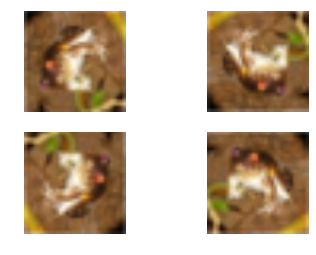

In [245]:
utils.visualize_image_group(X_train_aug[group_accuracy.argmax()])

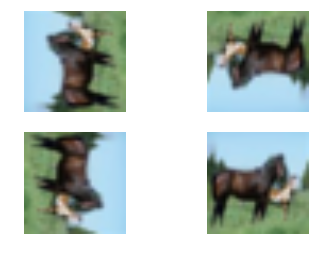

In [246]:
utils.visualize_image_group(X_train_aug[group_accuracy.argmin()])